In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Global

## Get data from GitHub

Use 3 dataframes to restore the data seperately. The output is the the update time, if should be one day ago (usually by morning EST, yesterday's full data is updated). If not, please wait until the output of this cell is yesterday

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
focus = df.copy().drop(['Lat','Long'], axis=1).set_index(['Country/Region','Province/State'])
confirm = focus.groupby('Country/Region').sum().T

df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
focus = df.copy().drop(['Lat','Long'], axis=1).set_index(['Country/Region','Province/State'])
death = focus.groupby('Country/Region').sum().T

df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
focus = df.copy().drop(['Lat','Long'], axis=1).set_index(['Country/Region','Province/State'])
recover = focus.groupby('Country/Region').sum().T

for i in [confirm, recover, death]:
    i.index = pd.to_datetime(i.index)

date = confirm.index[-1].strftime('_%m_%d')
print('Latest update time is:',date)

confirm['time'] = pd.to_datetime(confirm.index)
confirm.index = confirm.time.dt.strftime('%m/%d')
confirm.drop('time', axis=1, inplace=True)

Latest update time is: _04_14


## Update country plots

This cell generates the dynamic plots for the top 10 countries, next cell is used to generate a single country of interest. Please create a folder named "figures" the first time used
* offset is the starting days since Jan.22, generally set to 35, can be fine tuned in the next cell. 
* window is the number of days for rolling average, generally set to 7

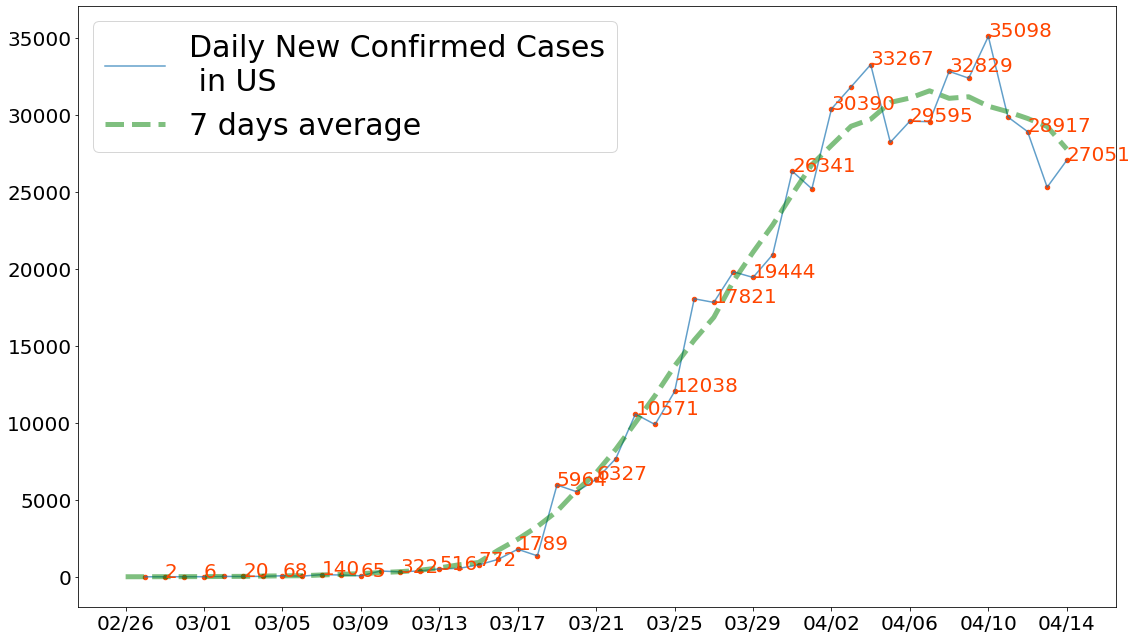

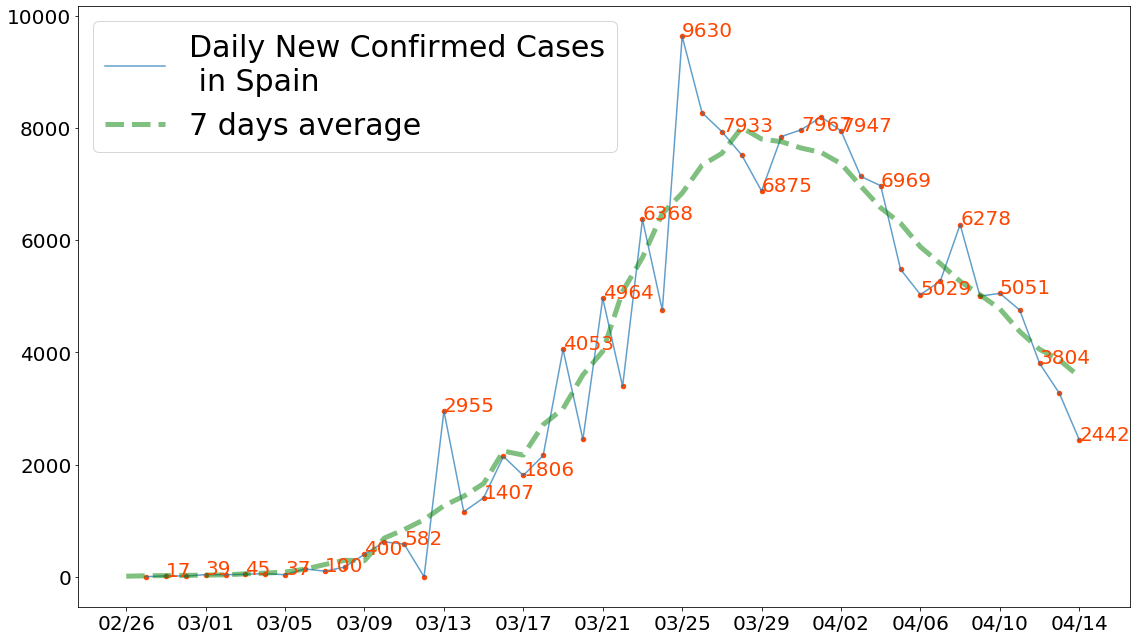

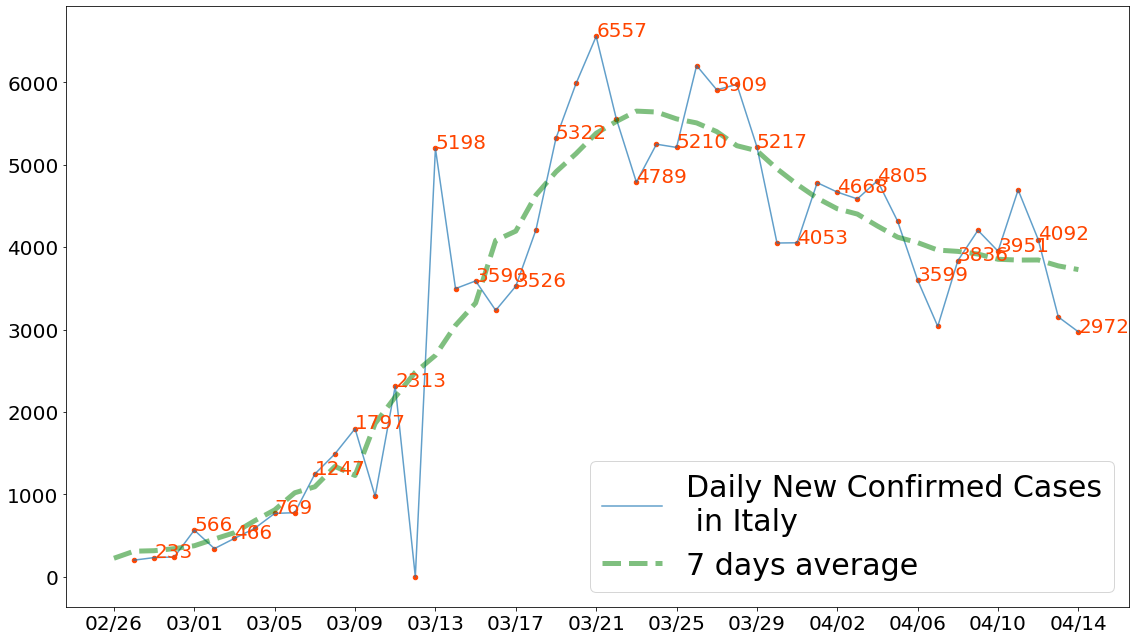

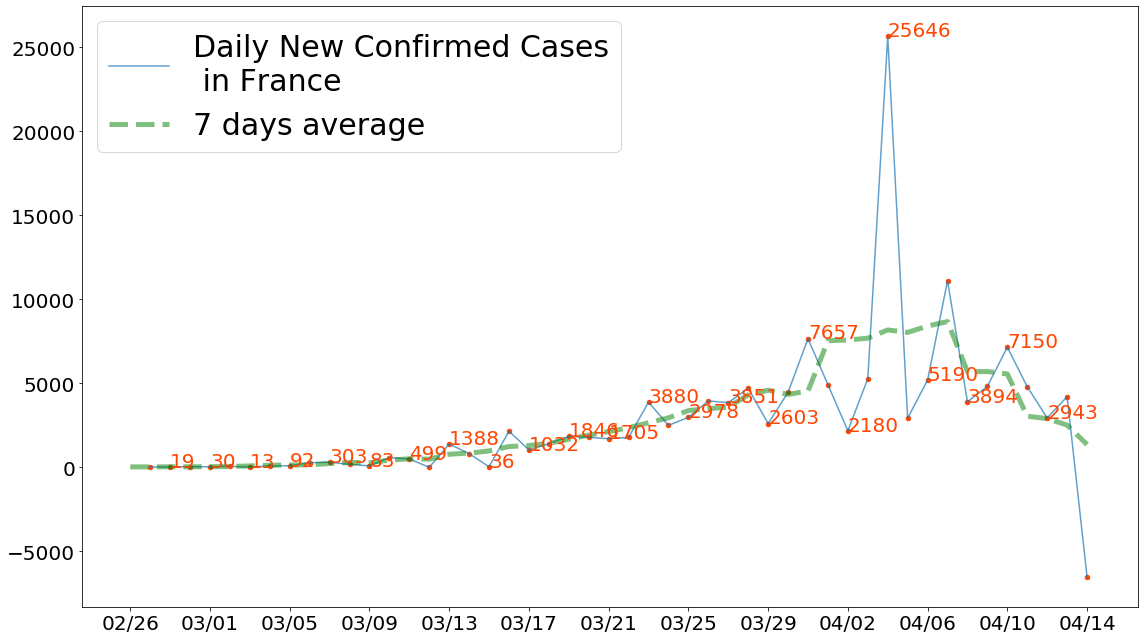

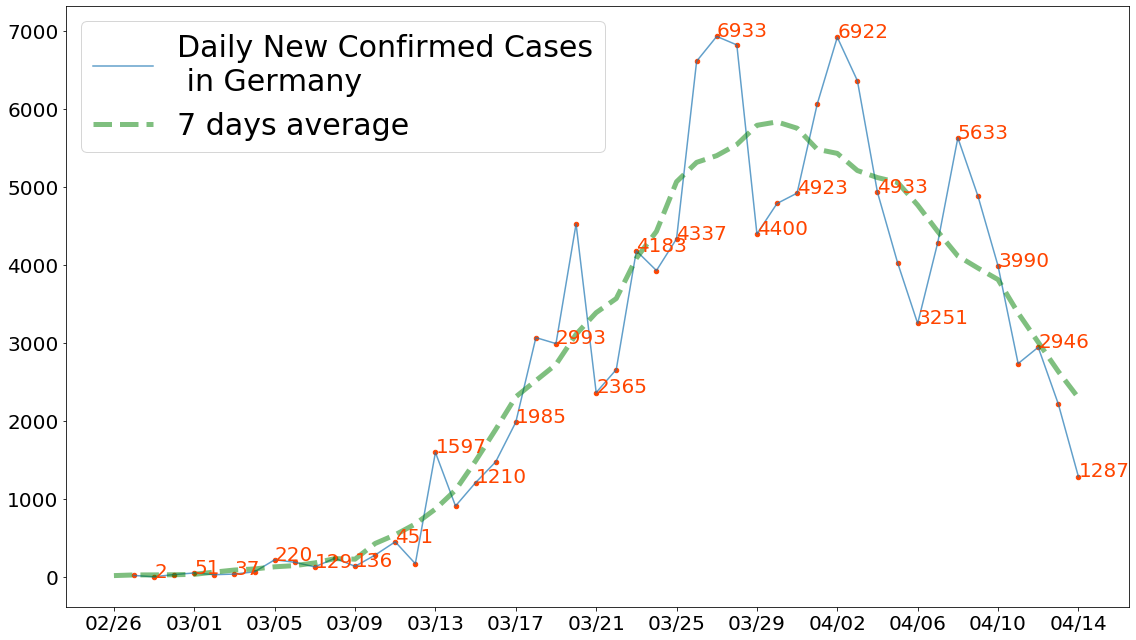

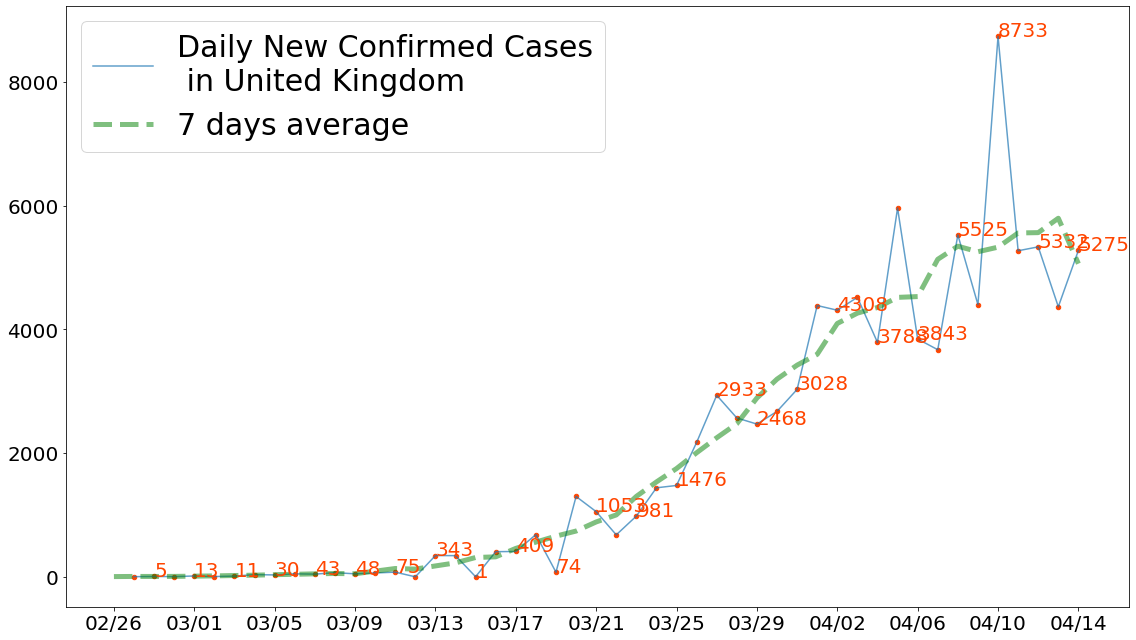

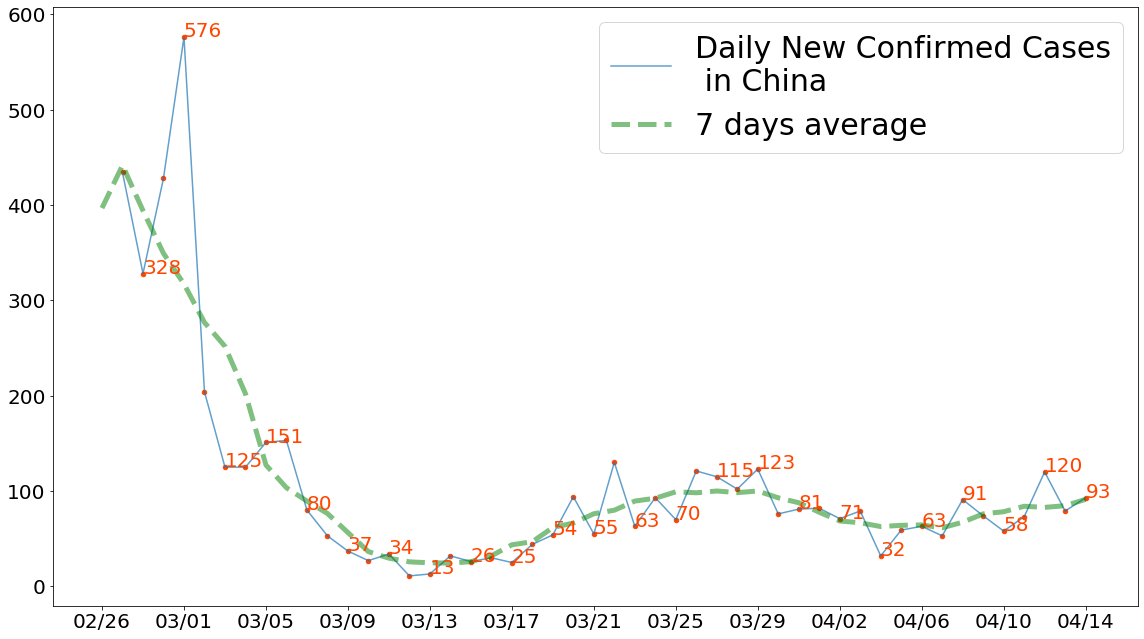

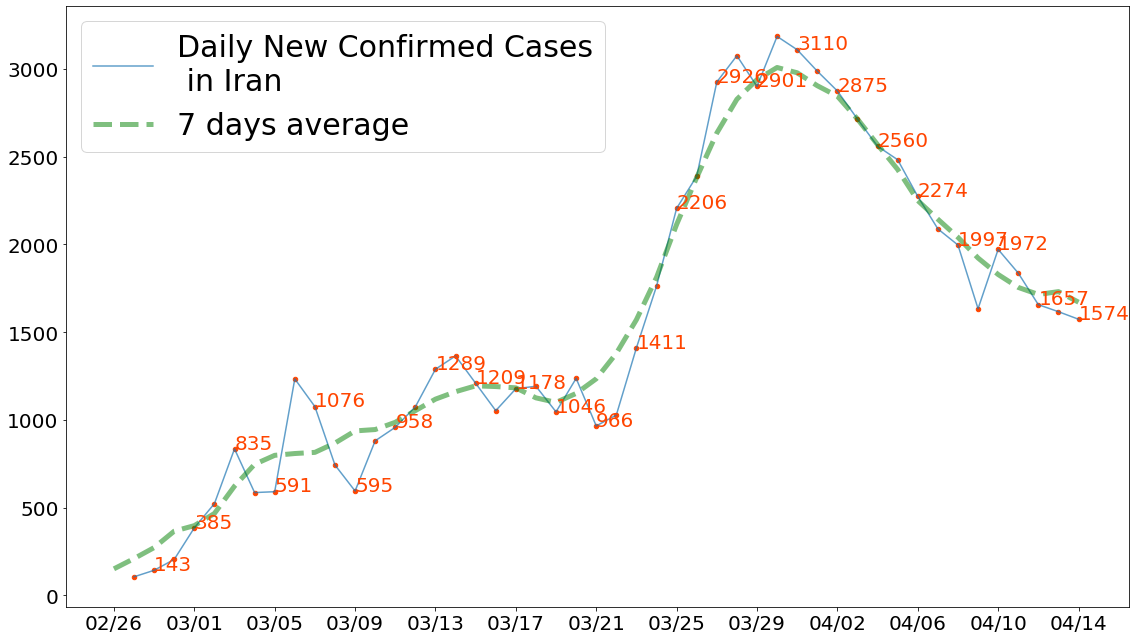

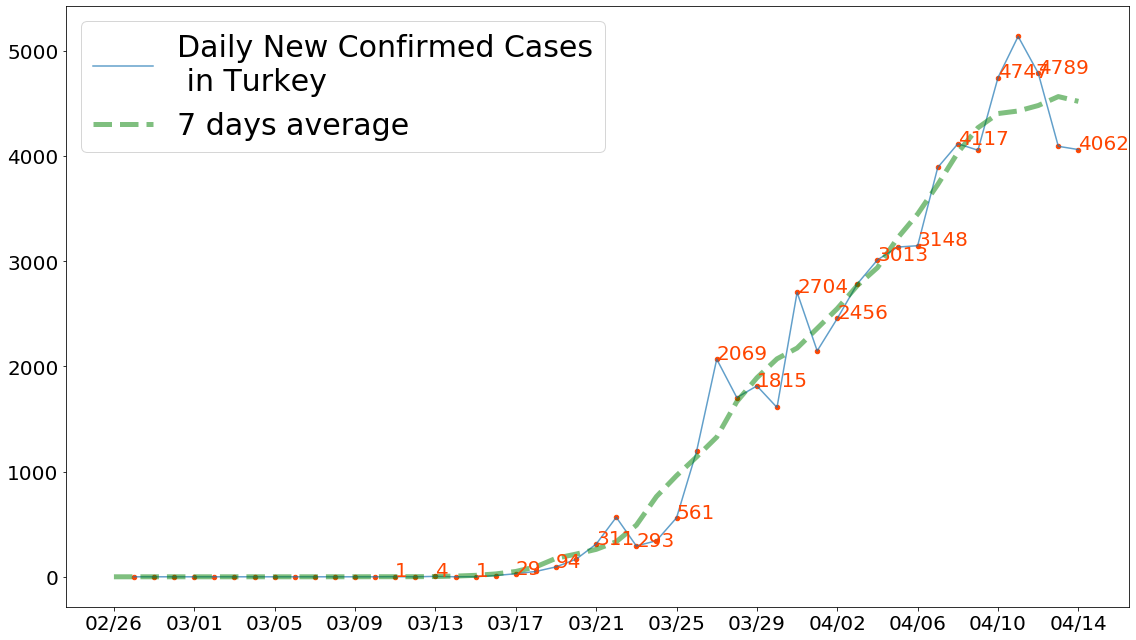

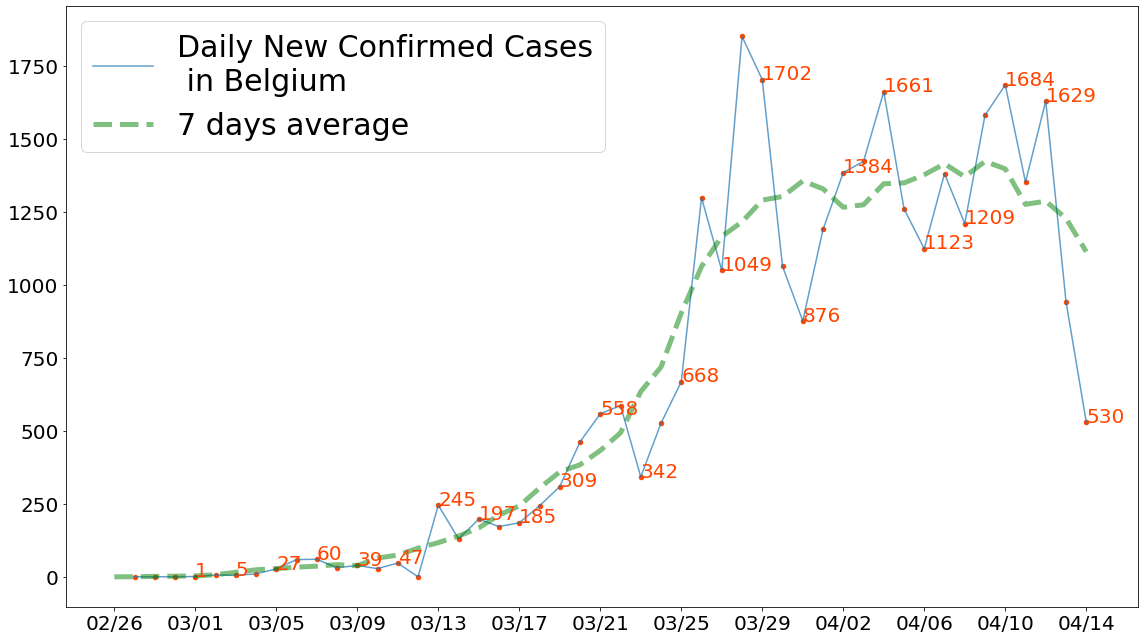

In [27]:
offset = 35
for j, country in enumerate(confirm.iloc[-1].sort_values(ascending=False).index[:10]):
    
    focus =  confirm.loc[:,[country]].copy()[offset:]
    focus['new'] = focus[country] - focus[country].shift(1)
    
    fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(16,9))
    ax.plot(focus.index, focus.new, label='Daily New Confirmed Cases\n in ' + country, alpha=0.7)
    ax.scatter(focus.index, focus.new, c='orangered',s=20, label='')

    window = 7
    focus['average'] = focus['new'].rolling(window=window, min_periods=1, center=True).mean()
    ax.plot(focus.index, focus.average, 'g--', lw=5, alpha=0.5, label='%d days average'%window)
    
    for i, v in enumerate(focus.new):
        if v > 0 and (i%2) != (len(focus.index)%2):
            ax.text(i, v+0.3, str(int(v)), color='orangered', fontsize=20)

    # ax.set_yscale('log')
    ax.tick_params(labelsize=20)
    ax.legend(fontsize=30)

    plt.tight_layout()
    ax.xaxis.set_major_locator(plt.MaxNLocator(15))
    plt.savefig(r'figures/%s.png'% ('Global_'+str(j+1)+'_'+country+date), dpi=600)
    plt.show()

## Individual country

This cell is used to generate the same plot for single country of interest, can alse be use to tune some parameters. For example, when plotting Turkey, the offset can be around 50 since they began the outbreak relatively late
In the previous plot, I annotate the fiugre every other number to avoid overlapping, here can be fine tuned to show all figures, but to put the numbers that's overlapping in the list to disable it

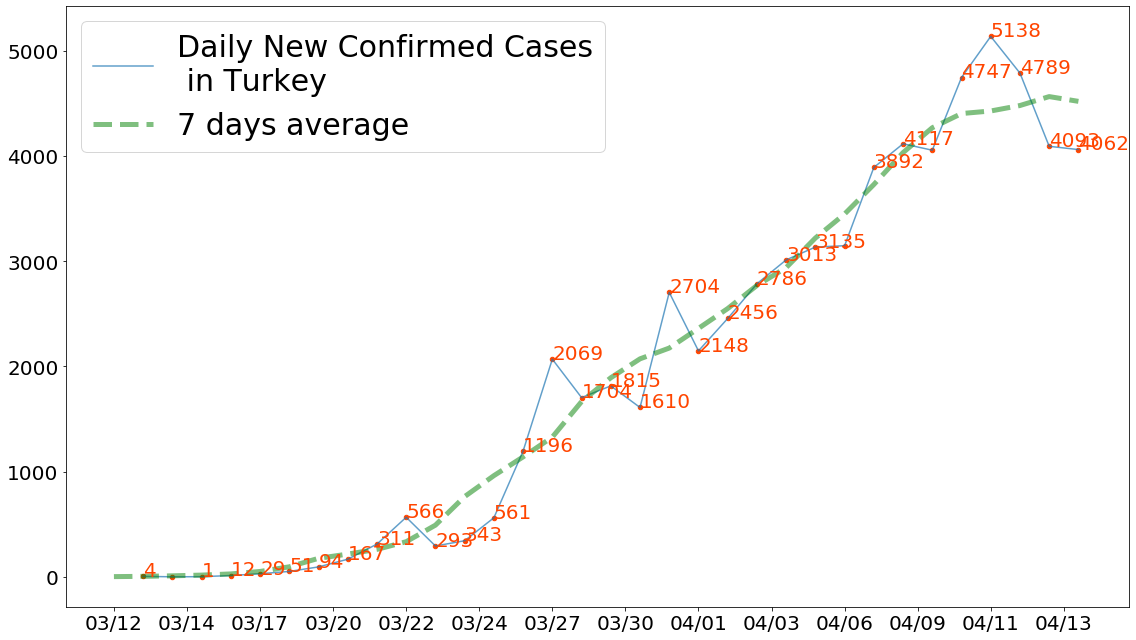

In [26]:
offset = 50
country = 'Turkey'

focus =  confirm.loc[:,[country]].copy()[offset:]
focus['new'] = focus[country] - focus[country].shift(1)

fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(16,9))
ax.plot(focus.index, focus.new, label='Daily New Confirmed Cases\n in ' + country, alpha=0.7)
ax.scatter(focus.index, focus.new, c='orangered',s=20, label='')

window = 7
focus['average'] = focus['new'].rolling(window=window, min_periods=1, center=True).mean()
ax.plot(focus.index, focus.average, 'g--', lw=5, alpha=0.5, label='%d days average'%window)

for i, v in enumerate(focus.new):
    if v > 0 and v not in [5974,4050,5210,4668,3590,6549,3148,19444,4056,32829,29595]:
        ax.text(focus.index[i], v+0.3, str(int(v)), color='orangered', fontsize=20)

# ax.set_yscale('log')
ax.tick_params(labelsize=20)
ax.legend(fontsize=30)

plt.tight_layout()
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
plt.savefig(r'figures/%s.png'% ('country+date), dpi=600)
plt.show()

# US states

## Get data from NYT repository

In [20]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')
df = df.pivot(index='date',columns='state',values='cases').iloc[32:]
df = df[df.sum().sort_values(ascending=False).index]

df['time'] = pd.to_datetime(df.index)
df.index = df.time.dt.strftime('%m/%d')
df.drop('time', axis=1, inplace=True)
df.index[-1]

'04/14'

## Batch generate

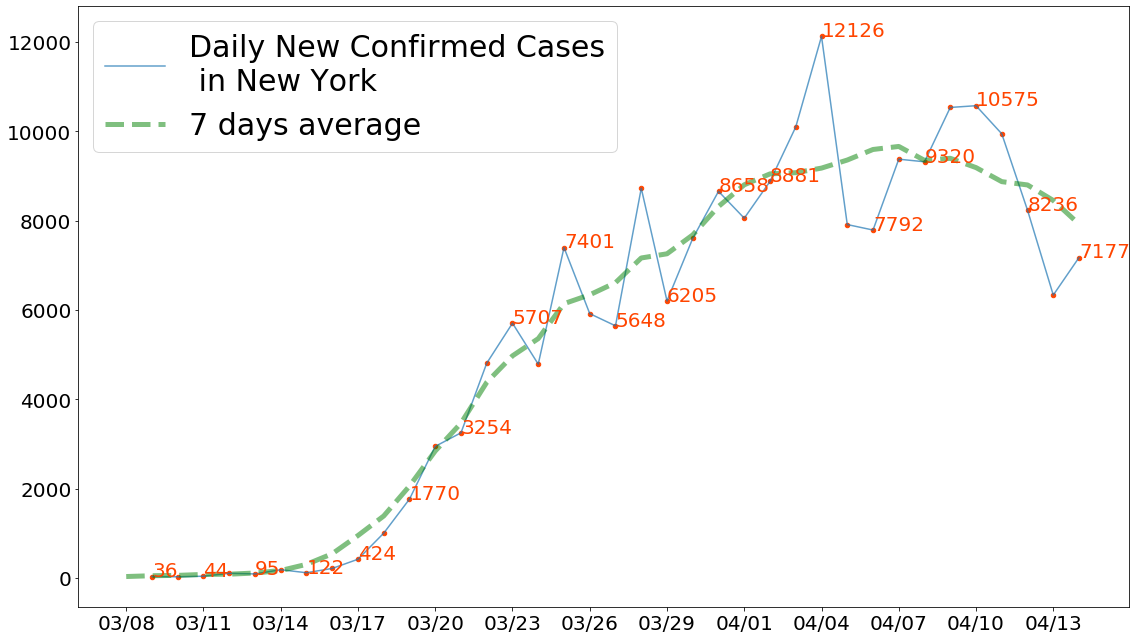

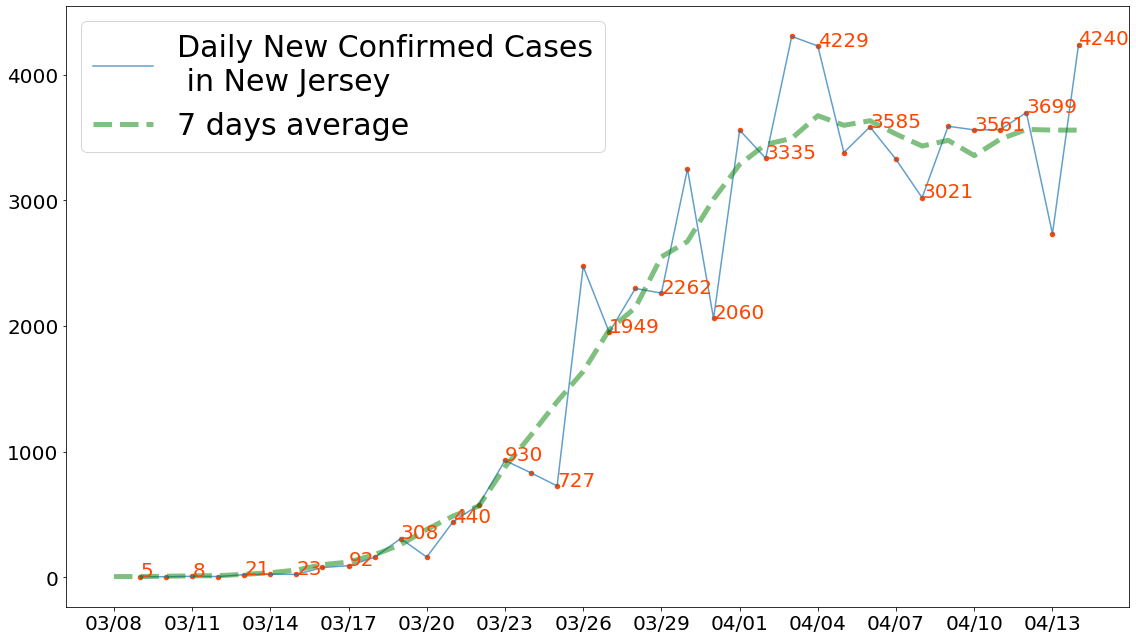

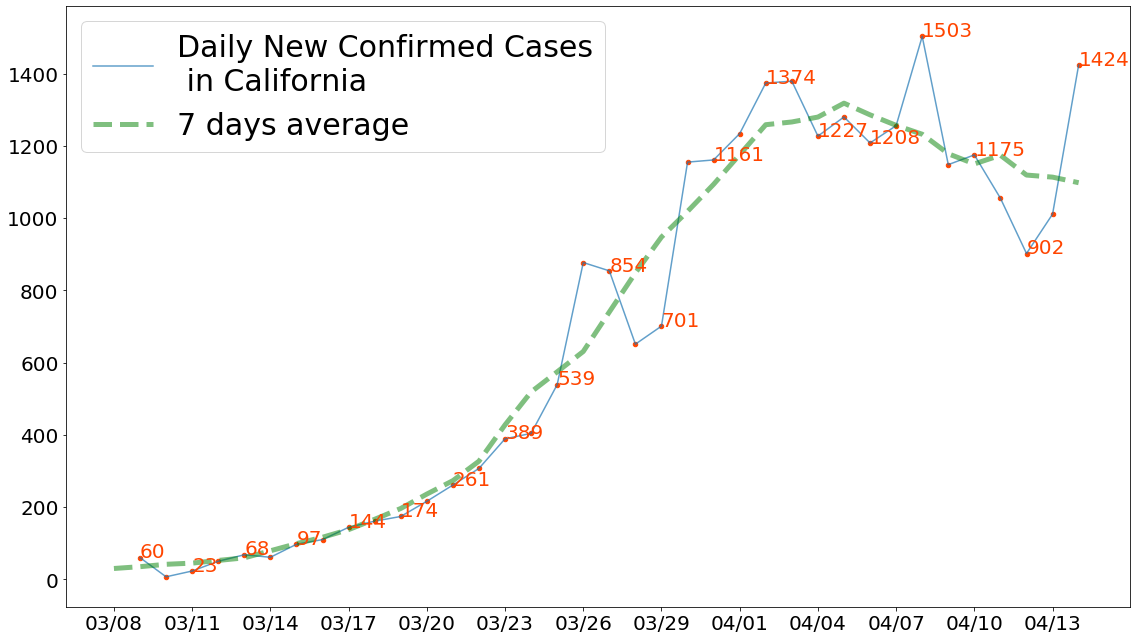

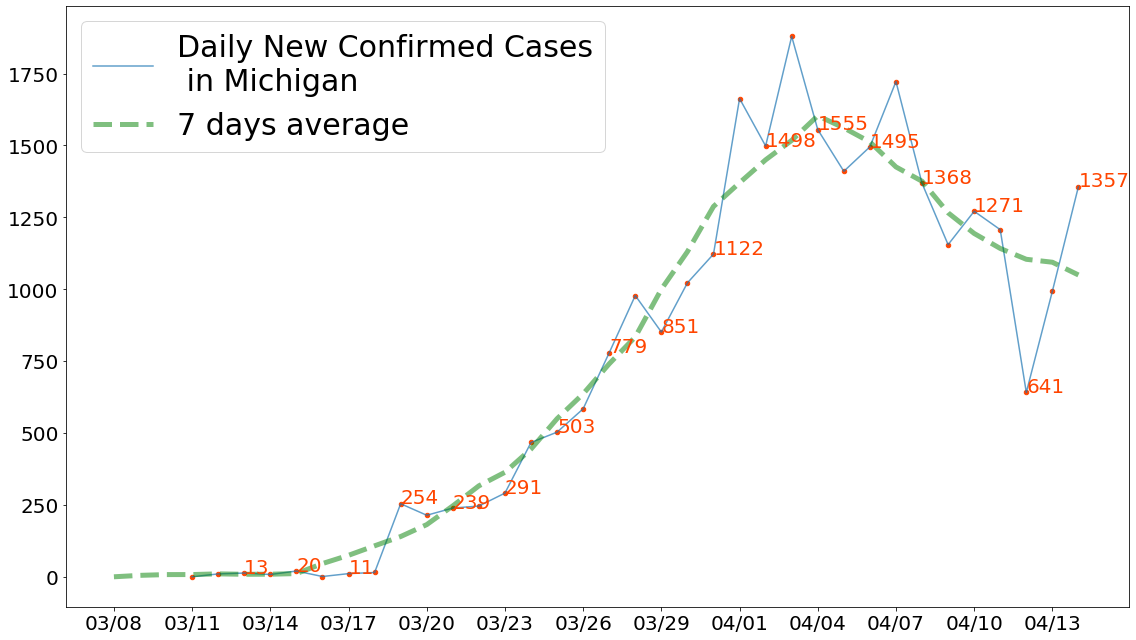

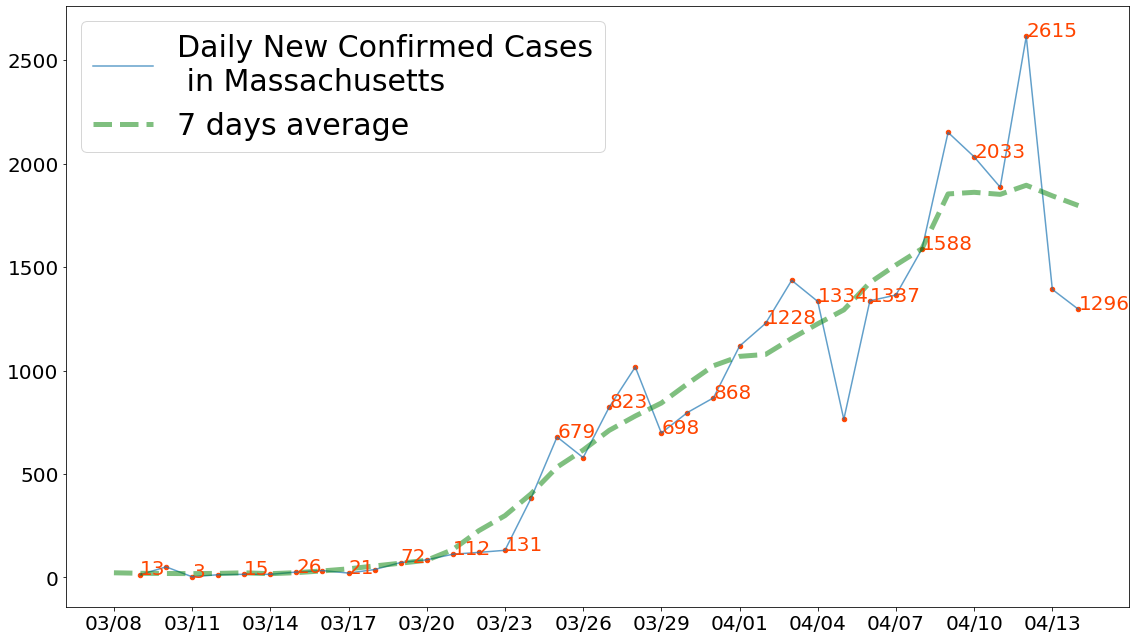

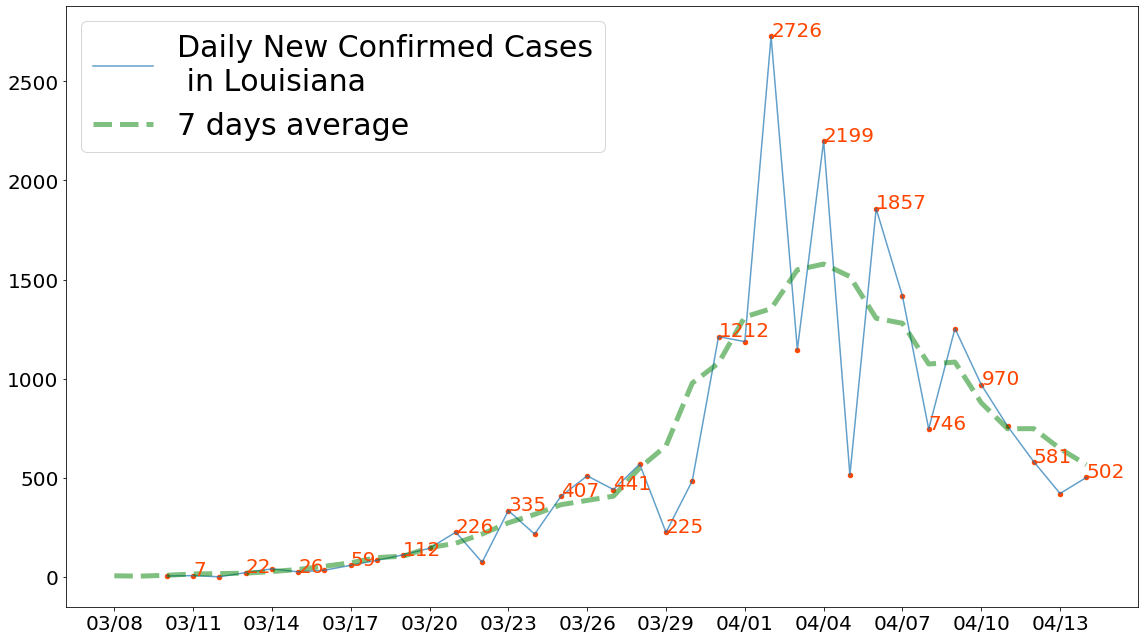

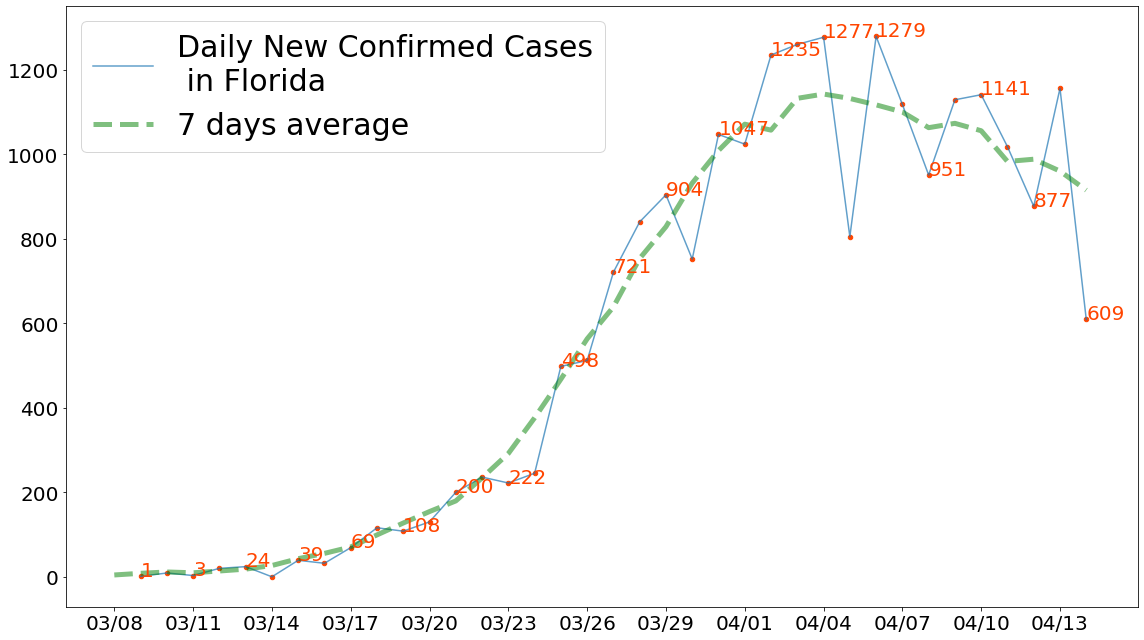

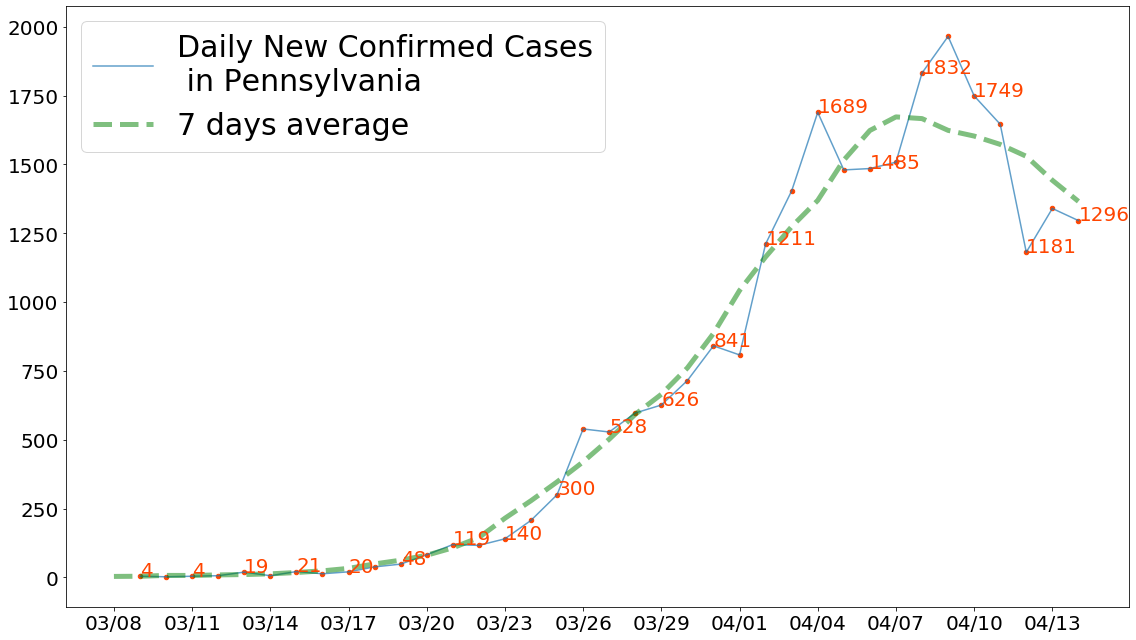

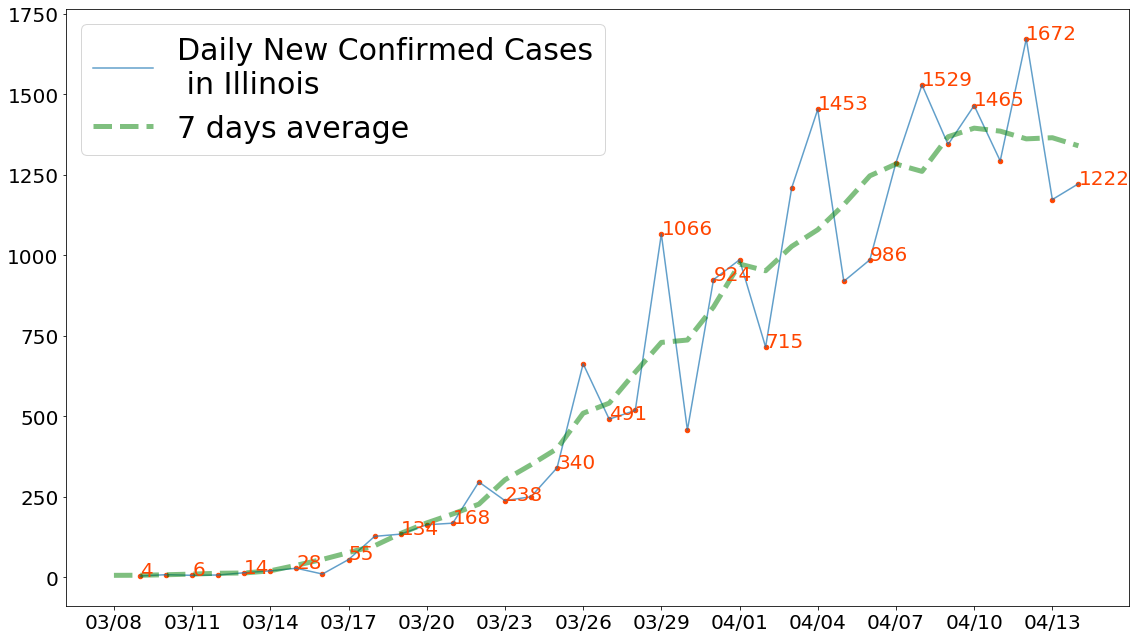

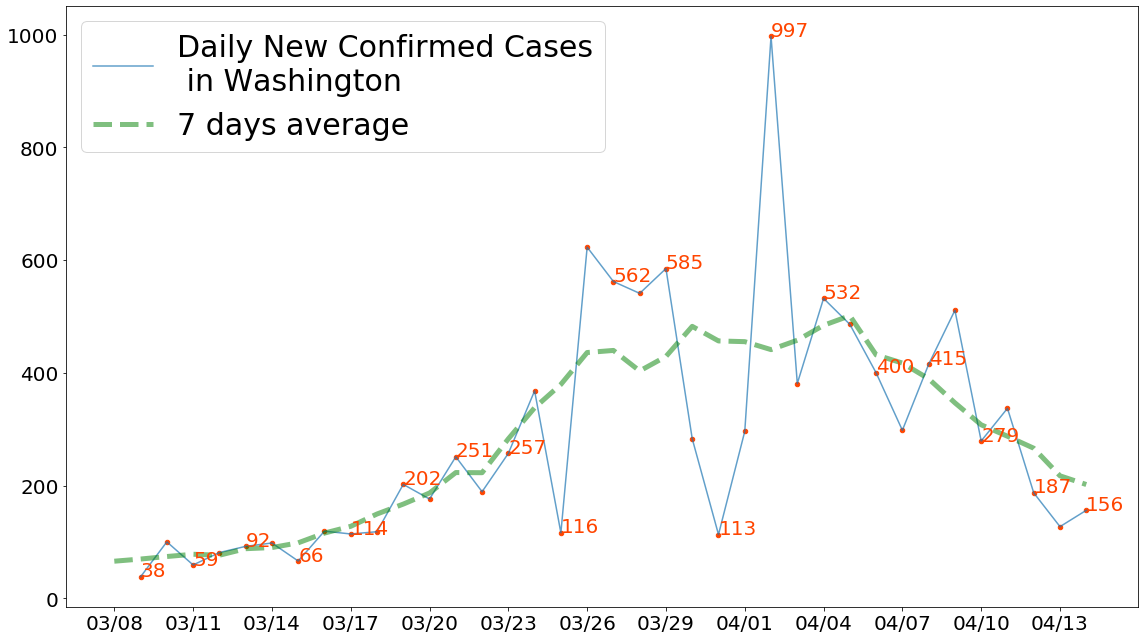

In [25]:
offset = 15
for j, country in enumerate(df.sum().sort_values(ascending=False).index[:10]):
    
    focus =  df.loc[:,[country]].copy()[offset:]
    focus['new'] = focus[country] - focus[country].shift(1)
    
    fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(16,9))
    ax.plot(focus.index, focus.new, label='Daily New Confirmed Cases\n in ' + country, alpha=0.7)
    ax.scatter(focus.index, focus.new, c='orangered',s=20, label='')

    window = 7
    focus['average'] = focus['new'].rolling(window=window, min_periods=1, center=True).mean()
    ax.plot(focus.index, focus.average, 'g--', lw=5, alpha=0.5, label='%d days average'%window)
    
    for i, v in enumerate(focus.new):
        if v > 0 and (i%2) != (len(focus.index)%2):
            ax.text(i, v+0.3, str(int(v)), color='orangered', fontsize=20)

    # ax.set_yscale('log')
    ax.tick_params(labelsize=20)
    ax.legend(fontsize=30)

    plt.tight_layout()
    ax.xaxis.set_major_locator(plt.MaxNLocator(15))
    plt.savefig(r'figures/%s.png'% ('US_'+str(j+1)+'_'+country+date), dpi=600)
    plt.show()